# 1. Shapiro Wilk Test
Tests weather a data sample has a Gaussian distribution

#### Assumptions
1. Observations in each sample are independent and identically distirbuted(iid)
2. Interpretation

- H0: the sample has a Gaussian Normal distribution.
- H1: the sample does not have a Gaussian/Normal distribution


In [35]:
# Example of the Shapiro-Wilk normality test
import pandas as pd
from scipy.stats import shapiro
import numpy as np
import seaborn as sns

df = sns.load_dataset('titanic')
data_normal = np.arange(-4, 4, 0.1)
test_data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

# stat, p_value = shapiro(df['fare'])
# print(f'stat={stat}, p={p_value}')
def check_normality(data):
    stat, p_value = shapiro(data)
    print(f'statistic: {stat}, p value: {p_value}')
    if p_value > 0.05:
        print('Data distribution is Gaussian at 5% significance level')
    else:
        print('Distribution is not a Normal Gaussian distribution')

In [20]:
# TODO:: Normalize the fair data and check through shapiro wilk test.


<AxesSubplot:>

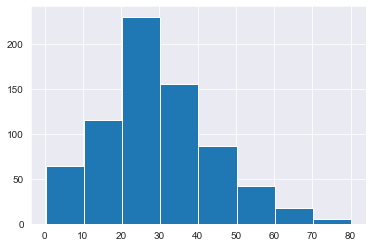

In [21]:
df['age'].hist(bins=8)


<AxesSubplot:xlabel='age'>

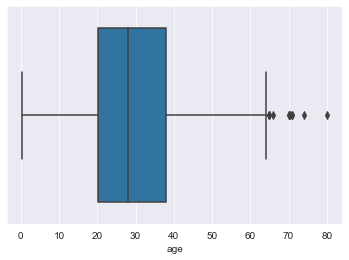

In [22]:
sns.boxplot(x=df['age'])


In [23]:
shapiro(df['age'])


ShapiroResult(statistic=nan, pvalue=1.0)

In [24]:
# lets drop na
age = df.dropna(subset=['age'])['age']


<AxesSubplot:xlabel='age'>

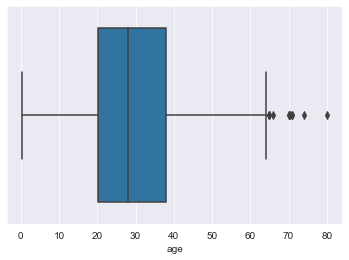

In [25]:
sns.boxplot(x=age)


In [26]:
shapiro(age)


ShapiroResult(statistic=0.9814548492431641, pvalue=7.322165629375377e-08)

In [27]:
check_normality(age)


Distribution is not a Normal Gaussian distribution


<AxesSubplot:xlabel='age', ylabel='Count'>

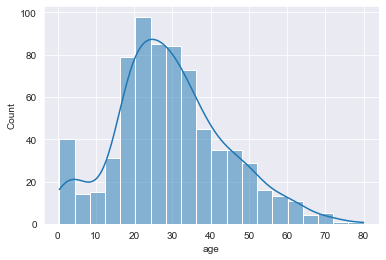

In [30]:
sns.histplot(kde=True, data=age)


In [31]:
df_original = df.copy()

<AxesSubplot:xlabel='age'>

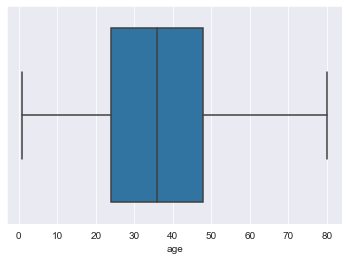

In [33]:
df.dropna(inplace=True)
sns.boxplot(x=df['age'])


In [36]:
check_normality(df['age'])


statistic: nan, p value: 1.0
Data distribution is Gaussian at 5% significance level


In [37]:
check_normality(df['fare'])


statistic: 0.5218914747238159, p value: 1.0789998175301091e-43
Distribution is not a Normal Gaussian distribution


In [38]:
df = df_original.copy()


In [39]:
check_normality(df['fare'])


statistic: 0.5218914747238159, p value: 1.0789998175301091e-43
Distribution is not a Normal Gaussian distribution


In [41]:
df['fare_log'] = np.log(df['fare'])
df.head()[['fare', 'fare_log']]


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,fare,fare_log
0,7.2500,1.981001
1,71.2833,4.266662
2,7.9250,2.070022
3,53.1000,3.972177
4,8.0500,2.085672


In [42]:
check_normality(df['fare_log'])


statistic: nan, p value: 1.0
Data distribution is Gaussian at 5% significance level


<AxesSubplot:xlabel='fare_log'>

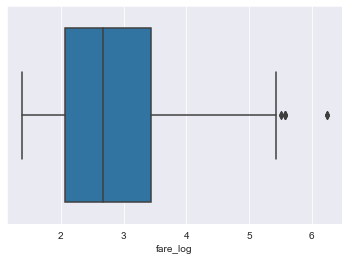

In [43]:
sns.boxplot(x=df['fare_log'])


<AxesSubplot:xlabel='fare_log', ylabel='Count'>

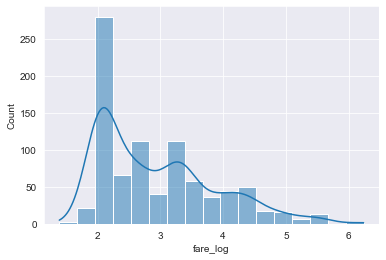

In [44]:
sns.histplot(data=df['fare_log'], kde=True)


In [45]:
check_normality(df['fare_log'])


statistic: nan, p value: 1.0
Data distribution is Gaussian at 5% significance level


# 2. Correlation test
### 1. Pearson's Correlation Coefficient

Tests weather two samples have a linear relationship

#### Assumptions
1. Observations in each sample are independent and identically distributed (iid)
2. Observations in each sample are normally distributed.
3. Observation in each sample have the same variance.
4. Interpretation

- H0: The two samples are independent.
- H1: There is a dependency between the samples.

In [80]:
from scipy.stats import pearsonr

age = df['age']
fare_log = df['fare_log']

check_normality(age)
check_normality(fare_log)

def pearson_correlation_test(data1, data2):
    stat, p = pearsonr(data1, data2)
    print(f'statistic: {stat}, p value: {p}')
    if p > 0.05:
        print("Independent at 5% significance level")
    else:
        print("There are 95% chances that the data is dependent to each other")



statistic: nan, p value: 1.0
Data distribution is Gaussian at 5% significance level
statistic: 0.9229278564453125, p value: 6.1919824520942976e-21
Distribution is not a Normal Gaussian distribution


In [81]:
age = age.replace(np.nan, age.mean())


In [82]:
pearson_correlation_test(age, fare_log)


statistic: 0.10372089458479032, p value: 0.0019348926705029868
There are 95% chances that the data is dependent to each other


In [99]:
# TODO:: draw a heatmap of the data

ValueError: Must pass 2-d input. shape=()

<AxesSubplot:>

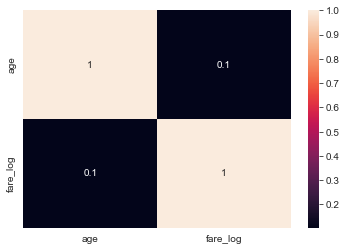

In [103]:
df1 = pd.DataFrame()
df1['age'] = age
df1['fare_log'] = fare_log
corr_data = df1.corr()
sns.heatmap(corr_data, annot=True)


In [104]:
import matplotlib.pyplot as plt

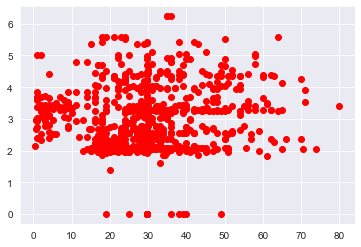

In [109]:
plt.scatter(age, fare_log, color="red")
# plt.plot(age, fare_log, color="blue")

# 2. Spearman's Rank Correlation

Tests weather two samples have a monotonic relationship.

<p style="color:red; font-weight:bold">
TODO:: ERROR CHANCES:
In slides, We read that spearman's test is to perform on non normal distribution.
but here it is written that the assumption is to have the noraml data.
</p>

#### Assumptions
1. Observations in each sample are independent and identically distributed (iid)
2. Observations in each sample can be ranked
3. Interpretation

- H0: the two samples are independent
- H1: there is a dependency between the samples


In [110]:
from scipy.stats import spearmanr

In [111]:
def spearman_correlation_test(data1, data2):
    stat, p = spearmanr(data1, data2)
    print(f'statistic: {stat}, p: {p}')
    if p > 0.05:
        print('data is independent at 5% significance level')
    else:
        print('95% chances are that the data is dependent')

In [112]:
spearman_correlation_test(age, fare_log)


statistic: 0.11884708066033668, p: 0.0003777382373651246
95% chances are that the data is dependent


# <div style="color: white; background: red; padding: 30 15"><h1 style="text-align:center">-------------- STOP --------------</h1></div>
<p style="color:red; font-weight:bold">
THIS IS IMPORTANT TO NOTE THAT WE ARE JUST CHECKING HOW TO PERFORM THESE TESTS, WITHOUT SATISFYING THEIR ASSUMPTIONS. DON'T PERFORM THESE TESTS ON LIVE DATA WITHOUT SATISFYING THEIR ASSUMPTIONS. OTHERWISE RESULTS CAN LEAD TO WRONG RESULTS, AND WRONG RESULTS CAN CAUSE LOSS OR DAMAGE IN REAL LIFE IMPLEMENTATIONS
</p>


# 3. Chi-Squared Test
Tests weather two categorical variables are related or independent.

#### Assumptions
1. Observations used in the calculation of the contingency table are independent.
2. 5 or more examples in each cell of the contingency table.
3. Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

In [113]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency


In [114]:
table = [
    [10, 20, 30],
    [6, 9, 17]
]

def chi2_contingency_test(data_table):
    stat, p, dof, expected = chi2_contingency(data_table)
    print(f'statistic: {stat}, p: {p}, dof: {dof}, expected: {expected}')
    if p > 0.05:
        print('Independent at 5% significance level')
    else:
        print('95% chances of dependence')

In [115]:
chi2_contingency_test(table)


statistic: 0.27157465150403504, p: 0.873028283380073, dof: 2, expected: [[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
Independent at 5% significance level


# 3. Parametric Statistical Hypothesis Tests
## 1. Student's t-test
Tests weather the means of two independent samples are significantly different.

#### Assumptions
1. Observations in each sample are independent and identically distributed(iid).
2. Observations in each sample are normally distributed.
3. Observations in each sample have the same variance.
4. Interpretation

- H0: the means of the samples are equal
- H1: the means of the samples are unequal.


In [124]:
from scipy.stats import ttest_ind, ttest_rel

In [118]:
def independent_ttest(data1, data2):
    stat, p = ttest_ind(data1, data2)
    print(f'statistic: {stat}, p: {p}')

    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('95% chance is that these are the different distributions')

In [119]:
independent_ttest(age, fare_log)


statistic: 61.35645565888911, p: 0.0
95% chance is that these are the different distributions


In [123]:
independent_ttest(age, age)


statistic: 0.0, p: 1.0
Probably the same distribution


## 2. Paired Student's t-test
Tests weather the means of two paired samples are significantly different.

#### Assumptions
1. Observations in each sample are independent and identically distributed(iid).
2. Observations in each sample are normally distributed.
3. Observations in each sample have the same variance.
4. Observations across each sample are paired.
5. Interpretation

- H0: the means of the samples are equal
- H1: the means of the samples are unequal.

In [125]:
def relational_ttest(data1, data2):
    stat, p = ttest_rel(data1, data2)
    print(f'statistic: {stat}, p: {p}')

    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('95% chance is that these are the different distributions')

In [130]:
relational_ttest(age, fare_log)


statistic: 61.850329363013515, p: 0.0
95% chance is that these are the different distributions


In [131]:
relational_ttest(age, df['fare'])


statistic: -1.4895248963069265, p: 0.13670347310166442
Probably the same distribution


# 4. Analysis of Variance Test (ANOVA)
Tests weather the means of two or more independent samples are significantly different.

#### Assumptions
1. Observations in each sample are independent and identically distributed(iid).
2. Observations in each sample are normally distributed.
3. Observations in each sample have the same variance.
4. Interpretation

- H0: the means of the samples are equal
- H1: the means of the samples are unequal.

In [132]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.085672


In [133]:
df['age_days'] = df['age']*365


In [134]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_log,age_days
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.981001,8030.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4.266662,13870.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2.070022,9490.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3.972177,12775.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.085672,12775.0


In [135]:
from scipy.stats import f_oneway


In [136]:
def anova_test(data1, data2, data3):
    stat, p = f_oneway(data1, data2, data3)
    print(f'statistic: {stat}, p: {p}')

    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('95% chance is that these are the different distributions')

In [151]:
age2 = age+2
age3 = age2*2
age4 = age2 + 2

data1 = np.arange(1, 20, 1)
data2 = np.arange(1, 20, 2)
data3 = np.arange(1, 20, 3)

In [152]:
anova_test(data1, data2, data3)

statistic: 0.0, p: 1.0
Probably the same distribution


In [153]:
anova_test(age, age2, age4)


statistic: 21.08222066840657, p: 8.234747162620404e-10
95% chance is that these are the different distributions


if p value less than 0.05, then we can perform `post hoc` tests
Those tests will provide information about
- how much data1 differs from data2
- and how much data2 differs from data3
